# Trabalho Prático

## 1. Introdução

Trabalho realizado para a disciplina de Estatística e Probabilidade do curso de Pós-Graduação em Inteligência Artificial e Machine Learning.

## 2. Obtendo os dados

In [27]:
# Importando bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

from scipy.stats import norm

import random

In [4]:
#Importando dados 
df1 = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")
dados=pd.DataFrame(df1)
dados=dados.set_index('date')
dados

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874","250,313",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487","250,049",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136","249,895",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3079,1","564,697","396,533","10,0705","1,74","250,73","248,906","249,521",...,"251,873","444,384","443,269","460,449","439,92","451,588","433,539","425,458","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3127,79","566,467","392,9","10,0713","1,74","250,313","252,202","249,082",...,"253,477","446,185","444,571","452,306","431,328","443,548","444,575","431,251","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3152,93","558,777","397,002","10,0722","1,74","249,895","253,63","249,258",...,"253,345","445,985","461,341","461,64","442,067","441,73","461,77","449,679","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3147,27","556,03","394,307","10,073","1,74","250,137","251,104","248,774",...,"250,884","446,686","478,385","459,103","455,074","439,798","457,738","455,915","66,91","1,31"


Convertendo dados de string para reais e trocando a vírgula pelo ponto.

In [5]:
def comma_to_dot(x):
    return x.replace(',','.')

for i in dados.columns:
    dados[i]=dados[i].apply(comma_to_dot)
    dados[i]=dados[i].astype(float)

dados

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713000,10.06640,1.74000,249.214,253.235,250.576,...,250.884000,457.396,432.962,424.954000,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383000,10.06720,1.74000,249.719,250.532,250.862,...,248.994000,451.891,429.560,432.939000,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668000,10.06800,1.74000,249.741,247.874,250.313,...,248.071000,451.240,468.927,434.610000,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939000,10.06890,1.74000,249.917,254.487,250.049,...,251.147000,452.441,458.165,442.865000,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254000,10.06970,1.74000,250.203,252.136,249.895,...,248.928000,452.441,452.900,450.523000,453.670,462.598,443.682,425.679,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3079.10,564.697,396.533000,10.07050,1.74000,250.730,248.906,249.521,...,251.873000,444.384,443.269,460.449000,439.920,451.588,433.539,425.458,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3127.79,566.467,392.900000,10.07130,1.74000,250.313,252.202,249.082,...,253.477000,446.185,444.571,452.306000,431.328,443.548,444.575,431.251,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3152.93,558.777,397.002000,10.07220,1.74000,249.895,253.630,249.258,...,253.345000,445.985,461.341,461.640000,442.067,441.730,461.770,449.679,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3147.27,556.030,394.307000,10.07300,1.74000,250.137,251.104,248.774,...,250.884000,446.686,478.385,459.103000,455.074,439.798,457.738,455.915,66.91,1.31


## 3. Análise dos Dados

### 3.1 Análise Descritiva

In [6]:
analise=dados.describe(include='all')
analise

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


### 3.2 Análise de Frequência

In [7]:
def limites(bins):
    a= ["" for x in range(len(bins)-1)]
    vtr=np.arange(len(bins)-1)
    for i in vtr:
        a[i]='['+"%.4f" % bins[i]+','+"%.4f" % bins[i+1]+'['
    return a

def tabela_frequencia(tamanho,bins):
    f=pd.DataFrame(limites(bins),columns=['Limites'])
    f['Frequência']=count
    f['Frequência Relativa(%)']=(f['Frequência']/tamanho)*100
    f['Frequência Acumalativa']=np.cumsum(f['Frequência'])
    f['Frequência Acumalativa Relativa(%)']=np.cumsum(f['Frequência Relativa(%)'])
    f.index.name='Intervalo'
    return f

#### 3.2.1 Concentração de Ferro em %

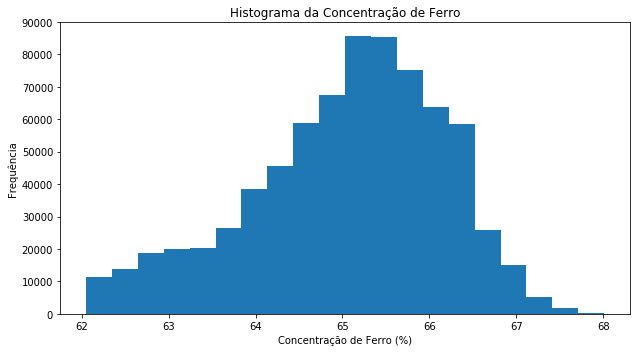

In [78]:
fig, ax = plt.subplots()

count, bins_I, ignored = plt.hist(dados['% Iron Concentrate'], 20)

ax.set_xlabel('Concentração de Ferro (%)')
ax.set_ylabel('Frequência')
ax.set_title('Histograma da Concentração de Ferro')
plt.rcParams['figure.figsize']=(9,7)

fig.tight_layout()
plt.show()

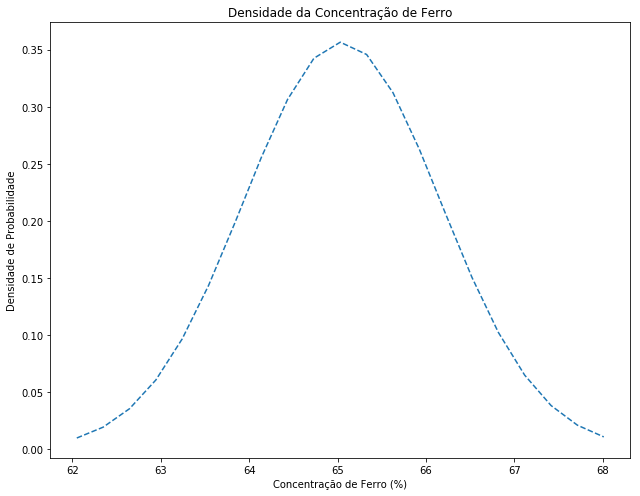

In [81]:
fig, ax = plt.subplots()

mu,sigma=analise.loc['mean','% Iron Concentrate'],analise.loc['std','% Iron Concentrate']
# Melhor ajuste: Distribuição Normal
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins_I - mu))**2))

ax.plot(bins_I,y, '--')
ax.set_xlabel('Concentração de Ferro (%)')
ax.set_ylabel('Densidade de Probabilidade')
ax.set_title('Densidade da Concentração de Ferro')

fig.tight_layout()
plt.show()

In [10]:
print('Tabela de Frequências da Concentração de Ferro')
f1=tabela_frequencia(len(dados),bins_I)
f1

Tabela de Frequências da Concentração de Ferro


,Limites,Frequência,Frequência Relativa(%),Frequência Acumalativa,Frequência Acumalativa Relativa(%)
Intervalo,,,,,
0,"[62.0500,62.3480[",11206.0,1.519554,11206.0,1.519554
1,"[62.3480,62.6460[",13790.0,1.869950,24996.0,3.389504
2,"[62.6460,62.9440[",18790.0,2.547959,43786.0,5.937463
3,"[62.9440,63.2420[",19957.0,2.706206,63743.0,8.643669
4,"[63.2420,63.5400[",20217.0,2.741463,83960.0,11.385132
5,"[63.5400,63.8380[",26443.0,3.585720,110403.0,14.970852
6,"[63.8380,64.1360[",38569.0,5.230028,148972.0,20.200881
7,"[64.1360,64.4340[",45440.0,6.161749,194412.0,26.362629
8,"[64.4340,64.7320[",58714.0,7.961728,253126.0,34.324357


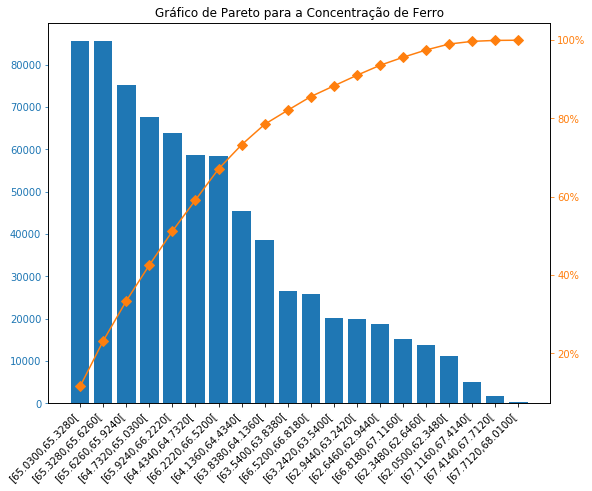

In [82]:
f1_pareto=f1.copy()
f1_pareto=f1_pareto.set_index(f1_pareto['Limites'])
f1_pareto=f1_pareto.drop(['Limites','Frequência Relativa(%)','Frequência Acumalativa','Frequência Acumalativa Relativa(%)'],axis=1)
f1_pareto=f1_pareto.sort_values(['Frequência'],ascending=False)

f1_pareto['Frequência Acumalativa Relativa(%)'] = f1_pareto['Frequência'].cumsum()/f1_pareto['Frequência'].sum()*100

fig, ax = plt.subplots()
ax.bar(f1_pareto.index,f1_pareto['Frequência'], color="C0")
ax2 = ax.twinx()
ax2.plot(f1_pareto.index,f1_pareto['Frequência Acumalativa Relativa(%)'], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xticklabels(f1_pareto.index, rotation = 45, ha="right")
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.title('Gráfico de Pareto para a Concentração de Ferro')
plt.show()

#### 3.2.2 Concentração de Sílica em %

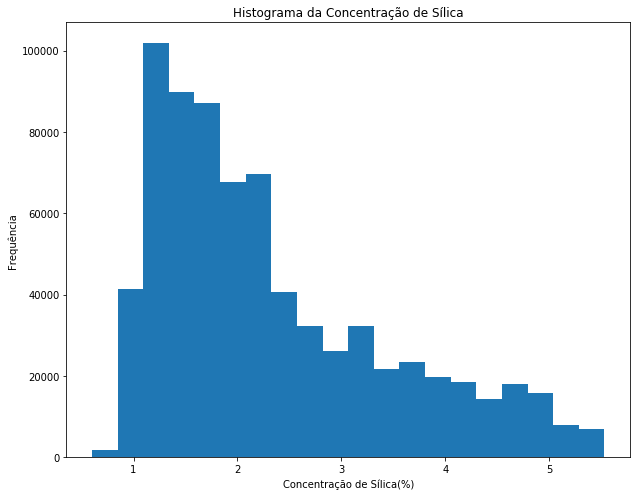

In [86]:
fig, ax = plt.subplots()

count, bins_S, ignored = plt.hist(dados['% Silica Concentrate'], 20)

ax.set_xlabel('Concentração de Sílica(%)')
ax.set_ylabel('Frequência')
ax.set_title('Histograma da Concentração de Sílica')

fig.tight_layout()
plt.show()

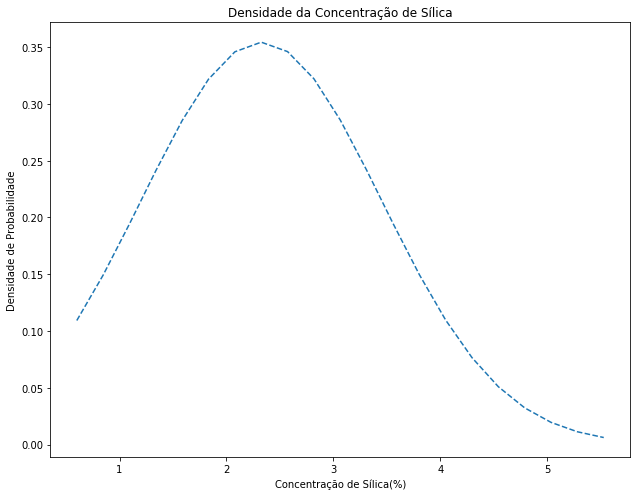

In [84]:
fig, ax = plt.subplots()

mu,sigma=analise.loc['mean','% Silica Concentrate'],analise.loc['std','% Silica Concentrate']
# Melhor ajuste: Distribuição Normal
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins_S - mu))**2))

ax.plot(bins_S,y, '--')
ax.set_xlabel('Concentração de Sílica(%)')
ax.set_ylabel('Densidade de Probabilidade')
ax.set_title('Densidade da Concentração de Sílica')

fig.tight_layout()
plt.show()

In [35]:
print('Tabela de Frequências da Concentração de Sílica')
f2=tabela_frequencia(len(dados),bins_S)
f2

Tabela de Frequências da Concentração de Sílica


,Limites,Frequência,Frequência Relativa(%),Frequência Acumalativa,Frequência Acumalativa Relativa(%)
Intervalo,,,,,
0,"[0.6000,0.8465[",1800.0,0.244083,1800.0,0.244083
1,"[0.8465,1.0930[",41442.0,5.619612,43242.0,5.863696
2,"[1.0930,1.3395[",101856.0,13.811863,145098.0,19.675559
3,"[1.3395,1.5860[",89815.0,12.179081,234913.0,31.854640
4,"[1.5860,1.8325[",87206.0,11.825296,322119.0,43.679936
5,"[1.8325,2.0790[",67713.0,9.182009,389832.0,52.861945
6,"[2.0790,2.3255[",69657.0,9.445619,459489.0,62.307564
7,"[2.3255,2.5720[",40758.0,5.526861,500247.0,67.834425
8,"[2.5720,2.8185[",32379.0,4.390653,532626.0,72.225077


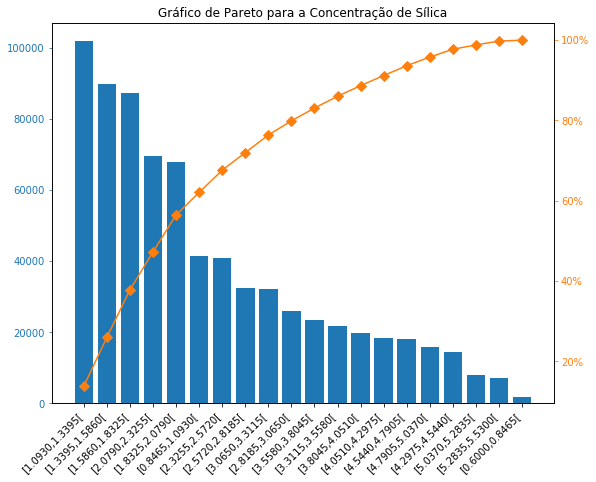

In [85]:
f2_pareto=f2.copy()
f2_pareto=f2_pareto.set_index(f2_pareto['Limites'])
f2_pareto=f2_pareto.drop(['Limites','Frequência Relativa(%)','Frequência Acumalativa','Frequência Acumalativa Relativa(%)'],axis=1)
f2_pareto=f2_pareto.sort_values(['Frequência'],ascending=False)

f2_pareto['Frequência Acumalativa Relativa(%)'] = f2_pareto['Frequência'].cumsum()/f2_pareto['Frequência'].sum()*100

fig, ax = plt.subplots()
ax.bar(f2_pareto.index,f2_pareto['Frequência'], color="C0")
ax2 = ax.twinx()
ax2.plot(f2_pareto.index,f2_pareto['Frequência Acumalativa Relativa(%)'], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xticklabels(f2_pareto.index, rotation = 45, ha="right")
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.title('Gráfico de Pareto para a Concentração de Sílica')
plt.show()

### 3.3 Análise de Covariância e Correlação

#### 3.3.1 Covariância

In [14]:
cov_d=dados.cov()
print('Matriz de Covariância')
cov_d

Matriz de Covariância


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,26.602325,-34.122072,1.753781e+02,-41.477376,8.039929,0.014873,-0.044831,-9.530139,-26.346793,-9.162881,...,-2.418539,19.933990,13.775310,11.819001,7.626496,10.153857,1.712036,11.262586,0.319780,-0.447313
% Silica Feed,-34.122072,46.341222,-1.329609e+02,48.897882,-9.956632,0.021114,0.049261,18.502334,37.471306,16.368598,...,8.841203,-34.151033,-32.253870,-23.283475,-21.277222,-25.178450,-11.930239,-26.821627,-0.336345,0.557222
Starch Flow,175.378103,-132.960891,1.476720e+06,28242.344466,503.354289,123.696403,19.018524,6879.933819,6836.033885,6360.844419,...,6786.340286,-46868.143616,-43363.261381,-55313.191285,-1406.904596,-5704.263821,-7832.138713,-3940.055249,94.691019,-90.811673
Amina Flow,-41.477376,48.897882,2.824234e+04,8323.010255,187.825161,4.367113,4.143014,300.830996,338.071730,265.636812,...,208.090835,-3209.690203,-2741.367185,-3949.081846,-1509.926228,-1632.775543,-1621.255755,-1301.497584,-11.241120,16.090861
Ore Pulp Flow,8.039929,-9.956632,5.033543e+02,187.825161,94.085829,0.444369,0.008247,-39.611687,-34.668825,-38.991938,...,-39.187351,-10.902079,-10.005791,-79.522386,-8.711186,1.853127,-14.522362,13.656523,0.901903,0.089764
Ore Pulp pH,0.014873,0.021114,1.236964e+02,4.367113,0.444369,0.149775,0.003087,1.869412,1.691099,2.137201,...,1.938218,-8.403599,-7.616562,-8.176871,1.647340,0.426636,-2.609500,0.624909,0.083551,-0.064355
Ore Pulp Density,-0.044831,0.049261,1.901852e+01,4.143014,0.008247,0.003087,0.004795,-0.010547,0.053852,-0.062637,...,-0.103823,-1.012575,-0.825617,-1.562497,-0.557867,-0.824718,-0.621144,-0.505958,0.001207,0.003662
Flotation Column 01 Air Flow,-9.530139,18.502334,6.879934e+03,300.830996,-39.611687,1.869412,-0.010547,877.420677,757.565036,807.466061,...,549.264885,-1713.671287,-1616.353414,-1661.213954,-168.420133,-228.835486,-316.736603,-278.431045,3.267154,-7.306813
Flotation Column 02 Air Flow,-26.346793,37.471306,6.836034e+03,338.071730,-34.668825,1.691099,0.053852,757.565036,908.983709,740.848366,...,500.114140,-1706.535511,-1633.949854,-1662.377495,-205.662134,-281.662828,-318.663519,-287.686457,1.981235,-5.680587
Flotation Column 03 Air Flow,-9.162881,16.368598,6.360844e+03,265.636812,-38.991938,2.137201,-0.062637,807.466061,740.848366,815.574698,...,531.737185,-1649.366134,-1540.683857,-1571.366138,-122.384880,-153.767650,-257.705234,-206.782872,3.199015,-7.035995


#### 3.3.2 Correlação

In [15]:
cor_d=dados.corr()
print('Matriz de Correlação')
cor_d

Matriz de Correlação


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,1.000000,-0.971833,0.027981,-0.088148,0.160705,0.007451,-0.125518,-0.062379,-0.169430,-0.062207,...,-0.016356,0.029499,0.020839,0.015191,0.016108,0.023288,0.003694,0.025723,0.055424,-0.077052
% Silica Feed,-0.971833,1.000000,-0.016073,0.078735,-0.150788,0.008014,0.104497,0.091757,0.182573,0.084197,...,0.045300,-0.038291,-0.036968,-0.022675,-0.034050,-0.043753,-0.019502,-0.046413,-0.044168,0.072724
Starch Flow,0.027981,-0.016073,1.000000,0.254748,0.042703,0.263020,0.226004,0.191131,0.186585,0.183288,...,0.194786,-0.294380,-0.278422,-0.301757,-0.012612,-0.055528,-0.071722,-0.038193,0.069657,-0.066394
Amina Flow,-0.088148,0.078735,0.254748,1.000000,0.212252,0.123690,0.655788,0.111321,0.122911,0.101957,...,0.079558,-0.268536,-0.234454,-0.286968,-0.180301,-0.211712,-0.197758,-0.168050,-0.110148,0.156701
Ore Pulp Flow,0.160705,-0.150788,0.042703,0.212252,1.000000,0.118376,0.012279,-0.137866,-0.118549,-0.140761,...,-0.140914,-0.008579,-0.008049,-0.054351,-0.009784,0.002260,-0.016661,0.016585,0.083120,0.008222
Ore Pulp pH,0.007451,0.008014,0.263020,0.123690,0.118376,1.000000,0.115189,0.163073,0.144935,0.193372,...,0.174684,-0.165739,-0.153557,-0.140070,0.046371,0.013041,-0.075034,0.019021,0.192992,-0.147739
Ore Pulp Density,-0.125518,0.104497,0.226004,0.655788,0.012279,0.115189,1.000000,-0.005142,0.025794,-0.031673,...,-0.052294,-0.111608,-0.093024,-0.149584,-0.087761,-0.140881,-0.099817,-0.086067,0.015580,0.046984
Flotation Column 01 Air Flow,-0.062379,0.091757,0.191131,0.111321,-0.137866,0.163073,-0.005142,1.000000,0.848277,0.954528,...,0.646768,-0.441573,-0.425758,-0.371791,-0.061940,-0.091386,-0.118992,-0.110726,0.098599,-0.219158
Flotation Column 02 Air Flow,-0.169430,0.182573,0.186585,0.122911,-0.118549,0.144935,0.025794,0.848277,1.000000,0.860438,...,0.578578,-0.432033,-0.422855,-0.365535,-0.074312,-0.110512,-0.117619,-0.112403,0.058744,-0.167398
Flotation Column 03 Air Flow,-0.062207,0.084197,0.183288,0.101957,-0.140761,0.193372,-0.031673,0.954528,0.860438,1.000000,...,0.649435,-0.440823,-0.420932,-0.364773,-0.046685,-0.063693,-0.100419,-0.085294,0.100136,-0.218891


#### 3.3.3 Relações de Dependência Ideal Positiva

In [16]:
print('Para a Concentação de Ferro maior ou igual a 0,7')
cor_I=cor_d['% Iron Concentrate']
cor_I[cor_I >=0.7]

Para a Concentação de Ferro maior ou igual a 0,7


% Iron Concentrate    1.0
Name: % Iron Concentrate, dtype: float64

Não há uma relação de dependência ideal para a concentração de Ferro e de Silica.

#### 3.3.4 Relações de Dependência Ideal Negativa

In [17]:
print('Para a Concentação de Ferro menor ou igual a -0,7')
cor_I=cor_d['% Iron Concentrate']
cor_I[cor_I <= -0.7]

Para a Concentação de Ferro menor ou igual a -0,7


% Silica Concentrate   -0.80056
Name: % Iron Concentrate, dtype: float64

Há uma forte relação inversa linear entre a Concentração de Silica com a de Ferro.

#### 3.3.5 Relações Independentes

In [18]:
print('Para a Concentação de Ferro entre [-0.1, 0,1]')
cor_I=cor_d['% Iron Concentrate']
cor_I[(cor_I >= -0.1) & (cor_I <= 0.1)]

Para a Concentação de Ferro entre [-0.1, 0,1]


% Iron Feed                     0.055424
% Silica Feed                  -0.044168
Starch Flow                     0.069657
Ore Pulp Flow                   0.083120
Ore Pulp Density                0.015580
Flotation Column 01 Air Flow    0.098599
Flotation Column 02 Air Flow    0.058744
Flotation Column 04 Air Flow   -0.067494
Flotation Column 05 Air Flow    0.088762
Flotation Column 06 Air Flow   -0.036523
Flotation Column 07 Air Flow   -0.002447
Flotation Column 01 Level      -0.014223
Flotation Column 02 Level      -0.026048
Flotation Column 03 Level      -0.022084
Flotation Column 06 Level       0.082300
Name: % Iron Concentrate, dtype: float64

In [19]:
print('Para a Concentação de Silica entre [-0.1, 0,1]')
cor_S=cor_d['% Silica Concentrate']
cor_S[(cor_S >= -0.1) & (cor_S <= 0.1)]

Para a Concentação de Silica entre [-0.1, 0,1]


% Iron Feed                    -0.077052
% Silica Feed                   0.072724
Starch Flow                    -0.066394
Ore Pulp Flow                   0.008222
Ore Pulp Density                0.046984
Flotation Column 04 Air Flow   -0.005011
Flotation Column 05 Air Flow   -0.009293
Flotation Column 06 Air Flow   -0.049650
Flotation Column 07 Air Flow   -0.071776
Flotation Column 01 Level       0.017217
Flotation Column 02 Level       0.030955
Flotation Column 03 Level       0.014246
Name: % Silica Concentrate, dtype: float64

#### 3.3.6 Gráfico Relação da Concntração de Sílica e Ferro

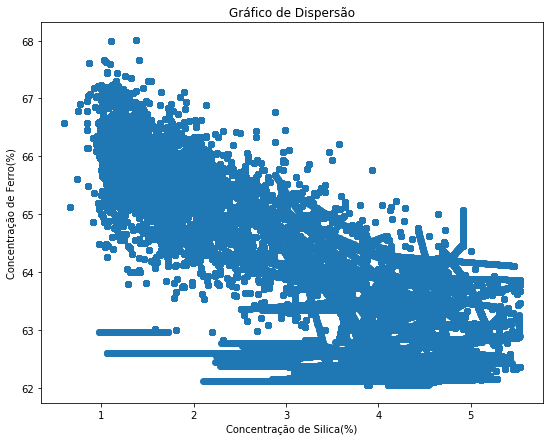

In [87]:
fig, ax = plt.subplots()

ax.set_xlabel('Concentração de Silica(%)')
ax.set_ylabel('Concentração de Ferro(%)')
ax.set_title('Gráfico de Dispersão')

plt.scatter(dados['% Silica Concentrate'],dados['% Iron Concentrate'])
plt.show()

## 4. Probabilidades

In [144]:
eventos=dados.copy()

def categorizar(x):
    valor='MÉDIO'
    if x < m1:
        valor='BAIXO'
    elif x > m2:
        valor='ALTO'
    return valor

### 4.1 Probabilidade para os níveis de concentração de ferro

In [145]:
amp_I=analise.loc['max','% Iron Concentrate']-analise.loc['min','% Iron Concentrate']
taxa_I=3
inter_I=amp_I/taxa_I
b=analise.loc['min','% Iron Concentrate']
m1=analise.loc['min','% Iron Concentrate']+inter_I
m2=m1+(taxa_I-2)*inter_I
a=analise.loc['max','% Iron Concentrate']
print('Níveis:')
print('BAIXO:','[',b,',',m1,'[')
print('MÉDIO:','[',m1,',',m2,']')
print('ALTO: ',']',m2,',',a,']')

eventos['% Iron Concentrate']=eventos['% Iron Concentrate'].apply(categorizar)

pA_I=(eventos.loc[eventos['% Iron Concentrate']=='ALTO','% Iron Concentrate'].count()/len(eventos))
pM_I=(eventos.loc[eventos['% Iron Concentrate']=='MÉDIO','% Iron Concentrate'].count()/len(eventos))
pB_I=(eventos.loc[eventos['% Iron Concentrate']=='BAIXO','% Iron Concentrate'].count()/len(eventos))
print('\nProbabilidade de sair nível BAIXO:',pB_I*100,'%')
print('Probabilidade de sair nível MÉDIO:',pM_I*100,'%')
print('Probabilidade de sair nível ALTO:',pA_I*100,'%')

Níveis:
BAIXO: [ 62.05 , 64.03666666666666 [
MÉDIO: [ 64.03666666666666 , 66.02333333333333 ]
ALTO:  ] 66.02333333333333 , 68.01 ]

Probabilidade de sair nível BAIXO: 18.60986395065177 %
Probabilidade de sair nível MÉDIO: 61.424117875986674 %
Probabilidade de sair nível ALTO: 19.966018173361558 %


### 4.2 Probabilidade para os níveis de concentração de sílica

In [146]:
amp_S=analise.loc['max','% Silica Concentrate']-analise.loc['min','% Silica Concentrate']
taxa_S=3
inter_S=amp_S/taxa_S
b=analise.loc['min','% Silica Concentrate']
m1=analise.loc['min','% Silica Concentrate']+inter_S
m2=m1+(taxa_S-2)*inter_S
a=analise.loc['max','% Silica Concentrate']
print('Níveis:')
print('BAIXO:','[',b,',',m1,'[')
print('MÉDIO:','[',m1,',',m2,']')
print('ALTO: ',']',m2,',',a,']')

eventos['% Silica Concentrate']=eventos['% Silica Concentrate'].apply(categorizar)

pA_S=(eventos.loc[eventos['% Silica Concentrate']=='ALTO','% Silica Concentrate'].count()/len(eventos))
pM_S=(eventos.loc[eventos['% Silica Concentrate']=='MÉDIO','% Silica Concentrate'].count()/len(eventos))
pB_S=(eventos.loc[eventos['% Silica Concentrate']=='BAIXO','% Silica Concentrate'].count()/len(eventos))
print('\nProbabilidade de sair nível BAIXO:',pB_S*100,'%')
print('Probabilidade de sair nível MÉDIO:',pM_S*100,'%')
print('Probabilidade de sair nível ALTO:',pA_S*100,'%')

Níveis:
BAIXO: [ 0.6 , 2.2433333333333336 [
MÉDIO: [ 2.2433333333333336 , 3.886666666666667 ]
ALTO:  ] 3.886666666666667 , 5.53 ]

Probabilidade de sair nível BAIXO: 60.197599033429924 %
Probabilidade de sair nível MÉDIO: 27.146136770750136 %
Probabilidade de sair nível ALTO: 12.656264195819936 %


### 4.3 Probabilidade para o nível alto/médio de concentração de ferro e baixo de sílica

In [147]:
pAB_IS=(eventos.loc[(eventos['% Iron Concentrate']=='ALTO') & (eventos['% Silica Concentrate']=='BAIXO'),'% Silica Concentrate'].count()/len(eventos))
print('Probabilidade de sair nível ALTO para ferro e BAIXO para sílica:',pAB_IS*100,'%')

Probabilidade de sair nível ALTO para ferro e BAIXO para sílica: 19.5266681402069 %


In [148]:
pMB_IS=(eventos.loc[(eventos['% Iron Concentrate']=='MÉDIO') & (eventos['% Silica Concentrate']=='BAIXO'),'% Silica Concentrate'].count()/len(eventos))
print('Probabilidade de sair nível ALTO para ferro e BAIXO para sílica:',pMB_IS*100,'%')

Probabilidade de sair nível ALTO para ferro e BAIXO para sílica: 39.870337499474545 %


### 4.4 Teorema de Bayes

O Teorema de Bayes para a proposta desse trabalho é dado por:

\begin{equation*}
\mathbf{ P(Concentração Ferro ALTO \mid Concentração Silica BAIXO)} = \frac{\mathbf{P(Concentração Ferro ALTO \cap Concentração Silica BAIXO)}}{\mathbf{ P( Concentração Silica BAIXO)}}
\end{equation*}

In [149]:
pIS_Bayes=pAB_IS/pB_S *100
print('A probabilidade condicional da concentração de Ferro ALTO dada a concentração de Sílica BAIXO:',pIS_Bayes,'%')

A probabilidade condicional da concentração de Ferro ALTO dada a concentração de Sílica BAIXO: 32.43761952924905 %


\begin{equation*}
\mathbf{ P(Concentração Ferro MÉDIO \mid Concentração Silica BAIXO)} = \frac{\mathbf{P(Concentração Ferro MÉDIO \cap Concentração Silica BAIXO)}}{\mathbf{ P( Concentração Silica BAIXO)}}
\end{equation*}

In [150]:
pmIS_Bayes=pMB_IS/pB_S *100
print('A probabilidade condicional da concentração de Ferro ALTO dada a concentração de Sílica BAIXO:',pmIS_Bayes,'%')

A probabilidade condicional da concentração de Ferro ALTO dada a concentração de Sílica BAIXO: 66.23243807005174 %


Mas outra análise pode ser feita, da seguinte forma:

\begin{equation*}
\mathbf{ P( Concentração Silica BAIXO \mid Concentração Ferro ALTO)} = \frac{\mathbf{P(Concentração Ferro ALTO \cap Concentração Silica BAIXO)}}{\mathbf{ P(Concentração Ferro ALTO)}}
\end{equation*}

In [151]:
pSI_Bayes=pAB_IS/pA_I *100
print('A probabilidade condicional da concentração de Sílica BAIXO dada a concentração de Ferro ALTO:',pSI_Bayes,'%')

A probabilidade condicional da concentração de Sílica BAIXO dada a concentração de Ferro ALTO: 97.79951100244499 %


\begin{equation*}
\mathbf{ P( Concentração Silica BAIXO \mid Concentração Ferro MÉDIO)} = \frac{\mathbf{P(Concentração Ferro MÉDIO \cap Concentração Silica BAIXO)}}{\mathbf{ P(Concentração Ferro MÉDIO)}}
\end{equation*}

In [152]:
pmSI_Bayes=pMB_IS/pM_I *100
print('A probabilidade condicional da concentração de Sílica BAIXO dada a concentração de Ferro MÉDIO:',pmSI_Bayes,'%')

A probabilidade condicional da concentração de Sílica BAIXO dada a concentração de Ferro MÉDIO: 64.90990652885155 %


#### 4.1 Teorema de Bayes aplicado para cada variável

Se deseja descobrir,

\begin{equation*}
\mathbf{ P(Concentração Ferro ALTO \mid X_{nm})} = \frac{\mathbf{P(Concentração Ferro ALTO \cap X_{nm})}}{\mathbf{ P(X_{nm})}}
\end{equation*}

\begin{equation*}
\mathbf{ P(Concentração Silica BAIXO \mid X_{nm})} = \frac{\mathbf{P(Concentração Silica BAIXO \cap X_{nm})}}{\mathbf{ P(X_{nm})}}
\end{equation*}

Sendo **Xnm** as n variáveis com m eventos (Alto, Médio, Baixo).

Considerando m=2, sendo BAIXO do menor valor até a metade de amplitude dos valores e ALTO da metade até o valor máximo das variáveis.

In [153]:
vetorj=eventos.columns

m=['BAIXO','ALTO']

def categoria(x):
    valor='ALTO'
    if x < metade:
        valor='BAIXO'
    return valor


for j in vetorj:
    if j != '% Iron Concentrate' and j != '% Silica Concentrate':
        metade=(analise.loc['max',j]+analise.loc['min',j])/2
        eventos[j]=eventos[j].apply(categoria)
        
eventos

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,ALTO,BAIXO,BAIXO,ALTO,BAIXO,ALTO,ALTO,BAIXO,BAIXO,BAIXO,...,BAIXO,BAIXO,BAIXO,BAIXO,ALTO,ALTO,ALTO,ALTO,ALTO,BAIXO
2017-03-10 01:00:00,ALTO,BAIXO,BAIXO,ALTO,BAIXO,ALTO,ALTO,BAIXO,BAIXO,BAIXO,...,BAIXO,BAIXO,BAIXO,BAIXO,ALTO,ALTO,ALTO,ALTO,ALTO,BAIXO
2017-03-10 01:00:00,ALTO,BAIXO,BAIXO,ALTO,ALTO,ALTO,ALTO,BAIXO,BAIXO,BAIXO,...,BAIXO,BAIXO,BAIXO,BAIXO,ALTO,ALTO,ALTO,ALTO,ALTO,BAIXO
2017-03-10 01:00:00,ALTO,BAIXO,BAIXO,ALTO,ALTO,ALTO,ALTO,BAIXO,BAIXO,BAIXO,...,BAIXO,BAIXO,BAIXO,BAIXO,ALTO,ALTO,ALTO,ALTO,ALTO,BAIXO
2017-03-10 01:00:00,ALTO,BAIXO,BAIXO,ALTO,ALTO,ALTO,ALTO,BAIXO,BAIXO,BAIXO,...,BAIXO,BAIXO,BAIXO,BAIXO,ALTO,ALTO,ALTO,ALTO,ALTO,BAIXO
2017-03-10 01:00:00,ALTO,BAIXO,BAIXO,ALTO,BAIXO,ALTO,ALTO,BAIXO,BAIXO,BAIXO,...,BAIXO,BAIXO,BAIXO,BAIXO,ALTO,ALTO,ALTO,ALTO,ALTO,BAIXO
2017-03-10 01:00:00,ALTO,BAIXO,BAIXO,ALTO,BAIXO,ALTO,ALTO,BAIXO,BAIXO,BAIXO,...,BAIXO,BAIXO,BAIXO,BAIXO,ALTO,ALTO,ALTO,ALTO,ALTO,BAIXO
2017-03-10 01:00:00,ALTO,BAIXO,ALTO,ALTO,BAIXO,ALTO,ALTO,BAIXO,BAIXO,BAIXO,...,BAIXO,BAIXO,BAIXO,BAIXO,ALTO,ALTO,ALTO,ALTO,ALTO,BAIXO
2017-03-10 01:00:00,ALTO,BAIXO,BAIXO,ALTO,BAIXO,ALTO,ALTO,BAIXO,BAIXO,BAIXO,...,BAIXO,BAIXO,BAIXO,BAIXO,ALTO,ALTO,ALTO,ALTO,ALTO,BAIXO


In [154]:
PAI_X_bayes=pd.DataFrame(np.zeros((2,21)),index=m,columns=vetorj[:-2])

for i in PAI_X_bayes.index:
    for j in PAI_X_bayes.columns:
        P_X=(eventos.loc[eventos[j]==i,j].count()/len(eventos))
        P_intercecao=(eventos.loc[(eventos['% Iron Concentrate']=='ALTO') & (eventos[j]==i),j].count()/len(eventos))
        PAI_X_bayes.loc[i,j]=(P_intercecao/P_X)*100
print('Para a concentração de Ferro ALTO tem:')
PAI_X_bayes

Para a concentração de Ferro ALTO tem:


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
BAIXO,17.972028,20.948480,18.336385,23.979387,16.675120,15.163171,20.237040,19.450982,20.960533,20.023373,...,15.774012,20.524345,20.813456,17.390901,17.401265,17.657286,15.543116,14.986055,15.975216,16.069354
ALTO,21.035177,18.023256,21.866976,16.768908,22.003003,24.446320,19.768088,20.237469,19.281274,19.937531,...,21.538616,19.778288,19.669893,23.585983,24.452962,22.951350,25.032585,25.978963,24.064505,24.278462


Text(0, 0.5, 'Probabilidade (%)')

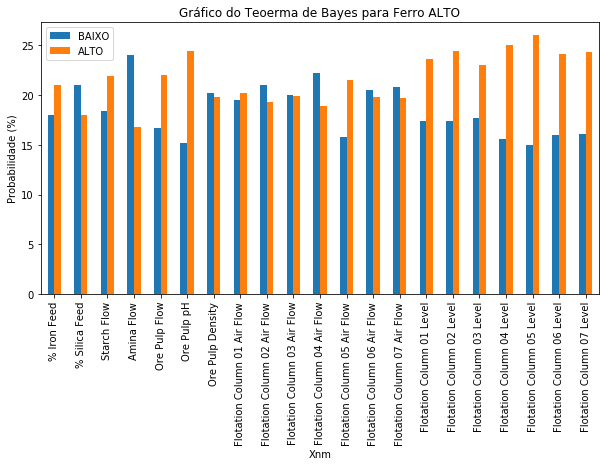

In [155]:
PAI_X_bayes.T.plot.bar()
plt.title('Gráfico do Teoerma de Bayes para Ferro ALTO')
plt.xlabel('Xnm')
plt.ylabel('Probabilidade (%)')
#plt.rcParams['figure.figsize']=(15,8)

In [156]:
PBS_X_bayes=pd.DataFrame(np.zeros((2,21)),index=m,columns=vetorj[:-2])

for i in PBS_X_bayes.index:
    for j in PBS_X_bayes.columns:
        P_X=(eventos.loc[eventos[j]==i,j].count()/len(eventos))
        P_intercecao=(eventos.loc[(eventos['% Silica Concentrate']=='BAIXO') & (eventos[j]==i),j].count()/len(eventos))
        PBS_X_bayes.loc[i,j]=(P_intercecao/P_X)*100
print('Para a concentração de Silica BAIXO tem:')
PBS_X_bayes

Para a concentração de Silica BAIXO tem:


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
BAIXO,56.986791,62.611455,56.483732,68.682050,60.818168,53.359370,63.322153,47.724996,52.627798,47.176264,...,59.464457,51.630426,50.779994,59.442349,60.740225,59.800025,52.971146,53.283669,54.291755,53.815933
ALTO,61.919205,55.424338,64.529804,53.438758,59.813482,66.576593,57.915706,66.771307,65.409564,66.665111,...,60.472632,63.078197,63.488444,61.259289,59.248295,60.711687,68.475718,68.545669,66.262802,67.260199


Text(0, 0.5, 'Probabilidade (%)')

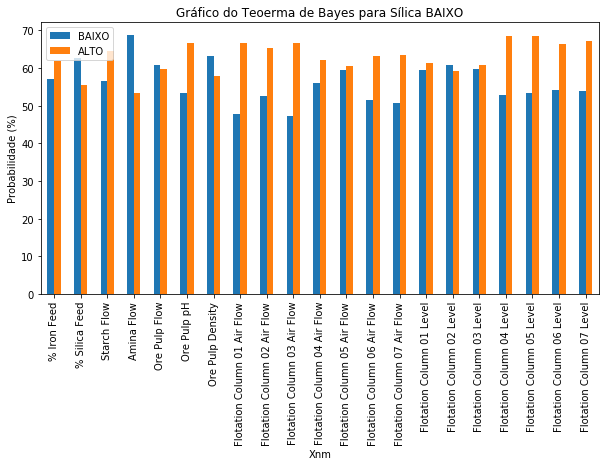

In [157]:
PBS_X_bayes.T.plot.bar()
plt.title('Gráfico do Teoerma de Bayes para Sílica BAIXO')
plt.xlabel('Xnm')
plt.ylabel('Probabilidade (%)')
#plt.rcParams['figure.figsize']=(10,5)

## 5 Teste de Hipótese e Intervalo de Confiança

### 5.1 Concentração de Ferro

In [225]:
# VALORES CERTOS
media_p=analise.loc['mean','% Iron Concentrate']

valores=dados.copy()
valores=valores.set_index(np.arange(len(dados)))

# Amostragem
tamanho_amostras=100
indice={random.randint(0, len(valores)) for i in np.arange(tamanho_amostras)}
amostra_I=valores.loc[indice,'% Iron Concentrate']
dp_a=amostra_I.std() # desvio padrão da amostra
media_a=amostra_I.mean()

print('Valores encontrados:')
print('Média da população:',media_p)
print('Média das',tamanho_amostras,'amostras aleatórias:',media_a)
print('Desvio padrão das',tamanho_amostras,'amostras:',dp_a)

Valores encontrados:
Média da população: 65.05006799071069
Média das 100 amostras aleatórias: 64.98971447802998
Desvio padrão das 100 amostras: 1.1341917669374533


### PROBLEMA 1: Um estudo realizado entre os dias 10/03/2017 e 09/09/2017 afirma que a média da concentração, em porcentagem, de ferro no minério depois do processo de flotação é de 65.0501%. Para aceitar ou rejeitar essa afirmação com um nível de significância de 5%, colhe-se, aleatoriamente, uma nova amostra  com 100 elementos, sendo o valor da média  e do desvio padrão iguais a:

In [226]:
print('Média:',media_a,'\nDesvio Padrão:',dp_a)

Média: 64.98971447802998 
Desvio Padrão: 1.1341917669374533


#### Solução: Fazer um teste de hipótese, utilizando a distribuição normal. A distribuição t pode ser aproximada da distribuição normal quando o tamanho da amostra é maior ou igual a 30, mesmo desconhecendo o desvio padrão populacional.

**Passo1:** Fixar qual a hipótese nula a ser tratada e qual a hipótese alternativa. 

\begin{equation*}
\mathbf{H_0}=65.0501
\end{equation*}

\begin{equation*}
\mathbf{H_a} \neq 65.0501
\end{equation*}

**Passo 2:** Definir o estatimador.

\begin{equation*}
\ z_0=\frac{\sqrt{n}(\bar{X}-\mu_0)}{\sigma}
\end{equation*}

In [227]:
z0=(np.sqrt(tamanho_amostras)*(media_a-media_p))/dp_a
print('O valor é:',z0)

O valor é: -0.5321279385026102


**Passo 3:** Construção da região crítica

Para 95%, tem-se:

\begin{equation*}
\ z_{\alpha/2}^1 = -1.96
\end{equation*}

\begin{equation*}
\ z_{\alpha/2}^2 = +1.96
\end{equation*}

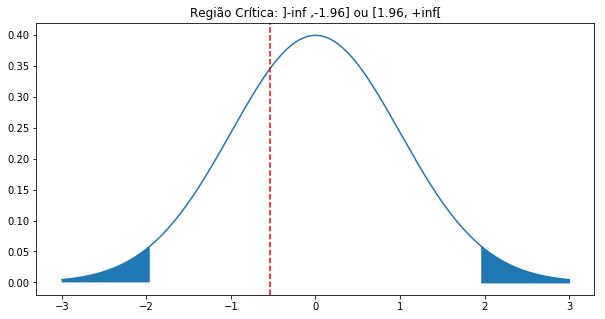

In [228]:
def regiao_critica(x, v1, v2, z0, mu, sigma):
    y = norm.pdf(x, mu, sigma)
    z1 = x[x<v1]
    z2 = x[x>v2]
    plt.plot(x, y)
    plt.axvline(x=z0, color='r', linestyle='--')
    plt.fill_between(z1, 0, norm.pdf(z1, mu, sigma))
    plt.fill_between(z2, 0, norm.pdf(z2, mu, sigma),color='#1f77b4')
    title=('Região Crítica: ]-inf ,'+ str(v1) + '] ou [' + str(v2) + ', +inf[')
    plt.title(title)
    plt.show()

z1=-1.96
z2=1.96  
x=np.arange(-3,3,0.001)
regiao_critica(x,z1,z2,z0,0,1)

**Passo 4**: Verfificar se z0 faz parte da região crítica.

Percebe-se que z0 não faz parte da região crítica, então aceita-se a hipotese nula. Ou seja, há evidências que a média da concentração em porcentagem de ferro é igual a 65.05401%.

O IC para 95% para a média da popluação é:

\begin{equation*}
\ IC(\mu;0.95)= \bar{X}\pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}}
\end{equation*}

In [229]:
print('O IC: ]',media_a+z1*(dp_a/np.sqrt(tamanho_amostras)),',',media_a+z2*(dp_a/np.sqrt(tamanho_amostras)),'[')

O IC: ] 64.76741289171024 , 65.21201606434973 [


### 5.2 Concentração de Sílica

In [132]:
# Valores certos
media_p2=analise.loc['mean','% Silica Concentrate']

valores=dados.copy()
valores=valores.set_index(np.arange(len(dados)))

# Amostragem
tamanho_amostras=100
indice2={random.randint(0, len(valores)) for i in np.arange(tamanho_amostras)}
amostra_S=valores.loc[indice,'% Silica Concentrate']
dp_a2=amostra_S.std() # desvio padrão da amostra
media_a2=amostra_S.mean()

print('Valores encontrados:')
print('Média da população:',media_p2)
print('Média das',tamanho_amostras,'amostras aleatórias:',media_a2)
print('Desvio padrão das',tamanho_amostras,'amostras:',dp_a2)

Valores encontrados:
Média da população: 2.326763251354863
Média das 100 amostras aleatórias: 2.3606503237740006
Desvio padrão das 100 amostras: 1.1474672194892874


### PROBLEMA 2: Um estudo realizado entre os dias 10/03/2017 e 09/09/2017 afirma que a média da concentração, em porcentagem, de sílica no minério depois do processo de flotação é de 2.3268%. Para aceitar ou rejeitar essa afirmação com um nível de significância de 5%, colhe-se, aleatoriamente, uma nova amostra com 100 elementos, sendo o valor da média e do desvio padrão iguais a:

In [133]:
print('Média:',media_a2,'\nDesvio Padrão:',dp_a2)

Média: 2.3606503237740006 
Desvio Padrão: 1.1474672194892874


#### Solução: Fazer um teste de hipótese, utilizando a distribuição normal. A distribuição t pode ser aproximada da distribuição normal quando o tamanho da amostra é maior ou igual a 30, mesmo desconhecendo o desvio padrão populacional.

**Passo1:** Fixar qual a hipótese nula a ser tratada e qual a hipótese alternativa.
    
\begin{equation*}
\mathbf{H_0}=2.3268
\end{equation*}

\begin{equation*}
\mathbf{H_a} \neq 2.3268
\end{equation*}

**Passo 2:** Definir o estatimador.

\begin{equation*}
\ z_0=\frac{\sqrt{n}(\bar{X}-\mu_0)}{\sigma}
\end{equation*}  

In [137]:
z02=(np.sqrt(tamanho_amostras)*(media_a2-media_p2))/dp_a2
print('O valor é:',z02)

O valor é: 0.2953206143372025


**Passo 3:** Construção da região crítica
    
Para 95%, tem-se:

\begin{equation*}
\ z_{\alpha/2}^1 = -1.96
\end{equation*}

\begin{equation*}
\ z_{\alpha/2}^2 = +1.96
\end{equation*}

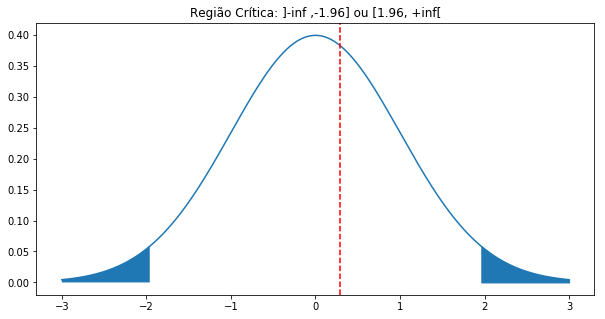

In [138]:
z1=-1.96
z2=1.96  
x=np.arange(-3,3,0.001)
regiao_critica(x,z1,z2,z02,0,1)

**Passo 4**: Verfificar se z0 faz parte da região crítica.
    
Percebe-se que z0 não faz parte da região crítica, então não rejeita-se a hipotese nula. Ou seja, há evidências que a média da concentração em porcentagem de sílica é igual a 2.3268%.

O IC para 95% para a média da popluação é:

\begin{equation*}
\ IC(\mu;0.95)= \bar{X}\pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}}
\end{equation*}

In [139]:
print('O IC: ]',media_a2+z1*(dp_a2/np.sqrt(tamanho_amostras)),',',media_a2+z2*(dp_a2/np.sqrt(tamanho_amostras)),'[')

O IC: ] 2.1357467487541 , 2.585553898793901 [


### 5.3 Para probablidade de Ferro ALTO e Sílica BAIXO

In [177]:
# Valores certos
prob=eventos.copy()
prob=prob.set_index(np.arange(len(eventos)))

pindice={random.randint(0, len(prob)) for i in np.arange(tamanho_amostras)}
amostra_P=prob.loc[pindice,:]

pAB_IS_a=(amostra_P.loc[(amostra_P['% Iron Concentrate']=='ALTO') & (amostra_P['% Silica Concentrate']=='BAIXO'),'% Silica Concentrate'].count()/tamanho_amostras)
print('Valores obtidos:')
print('Probablidade de sair nível ALTO para concentração de ferro e BAIXO para concentração de sílica:',pAB_IS)
print('A probabilidade de sair nível ALTO para concentração de ferro e BAIXO para concentração de sílica para 100 amostras:',pAB_IS_a)

Valores obtidos:
Probablidade de sair nível ALTO para concentração de ferro e BAIXO para concentração de sílica: 0.19526668140206901
A probabilidade de sair nível ALTO para concentração de ferro e BAIXO para concentração de sílica para 100 amostras: 0.23


### PROBLEMA 3: Um estudo realizado entre os dias 10/03/2017 e 08/09/2017 afirma que a probabilidade de ter um nivel ALTO de concentração de ferro e um nível de BAIXO de concentração de sílica é maior que 19,5267%. Para aceitar ou rejeitar essa afirmação com um nível de significância de 5%, colhe-se, aleatoriamente, uma nova amostra com 100 elementos de um experimento realizado no dia 09/09/2017, sendo o valor da probabilidade encontrada é de:

In [178]:
print('Valor:',pAB_IS_a)

Valor: 0.23


#### Solução: Fazer um teste de hipótese, utilizando a distribuição normal.

**Passo1:** Fixar qual a hipótese nula a ser tratada e qual a hipótese alternativa.
    
\begin{equation*}
\mathbf{H_0} \leq 19.5267
\end{equation*}

\begin{equation*}
\mathbf{H_a} > 19.5267
\end{equation*}

**Passo 2:** Definir o estatimador.

\begin{equation*}
\ z_0=\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}
\end{equation*}  

In [179]:
z03=(pAB_IS_a-pAB_IS)/np.sqrt((pAB_IS*(1-pAB_IS))/tamanho_amostras)
print('O valor é:',z03)

O valor é: 0.8762059860132698


**Passo 3:** Construção da região crítica
    
Para 95%, tem-se:

\begin{equation*}
\ z_{\alpha} = 1.64
\end{equation*}


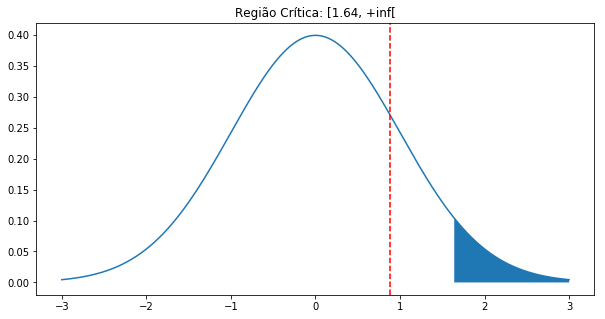

In [180]:
def regiao_critica_unilateral(x, v, de, z0, mu, sigma):
    y = norm.pdf(x, mu, sigma)
    if de==1: # Direito
        z = x[x>v]
    else: # Esquerdo
        z = x[x<v]
    plt.plot(x, y)
    plt.axvline(x=z0, color='r', linestyle='--')
    plt.fill_between(z, 0, norm.pdf(z, mu, sigma))
    if de==1: # Direito
        title=('Região Crítica: [' + str(v) + ', +inf[')
    else: 
        title=('Região Crítica: ] -inf' + str(v) +']')
    plt.title(title)
    plt.show()
    
z=1.64 
x=np.arange(-3,3,0.001)
regiao_critica_unilateral(x,z,1,z03,0,1)

**Passo 4:** Verficar se z0 faz parte da região crítica.
    
Percebe-se que z0 não faz parte da região crítica, então aceita-se a hipotese nula. Ou seja, há evidências que a proporção de nível ALTO para concentração de Ferro e BAIXO para Sílica seja menor ou igaul a 19,5267%.

O IC para 95% para a média da popluação é:

\begin{equation*}
\ IC(\mu;0.95)= \hat{p}\pm z_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
\end{equation*}


In [183]:
print('O IC: ]',pAB_IS_a+z1*(np.sqrt((pAB_IS_a*(1-pAB_IS_a))/tamanho_amostras)),',',pAB_IS_a+z2*(np.sqrt((pAB_IS_a*(1-pAB_IS_a))/tamanho_amostras)),'[')

O IC: ] 0.14751682838299685 , 0.3124831716170032 [


### 5.4 Probabilidade de Sílica BAIXO

In [218]:
pindice2={random.randint(0, len(prob)) for i in np.arange(tamanho_amostras)}
amostra_P2=prob.loc[pindice2,:]

pB_S_a2=(amostra_P2.loc[amostra_P2['% Silica Concentrate']=='BAIXO','% Silica Concentrate'].count()/tamanho_amostras)
print('Valores obtidos:')
print('Probablidade de sair BAIXO para concentração de sílica:',pB_S)
print('A probabilidade de sair nível ALTO para concentração de ferro e BAIXO para concentração de sílica para 100 amostras:',pB_S_a2)

Valores obtidos:
Probablidade de sair BAIXO para concentração de sílica: 0.6019759903342993
A probabilidade de sair nível ALTO para concentração de ferro e BAIXO para concentração de sílica para 100 amostras: 0.68


### PROBLEMA 4: Um estudo realizado entre os dias 10/03/2017 e 09/09/2017 afirma que a probabilidade de ter um nivel BAIXO de concentração de sílica depois de um processo de flotação é de e um nível de BAIXO de concentração de sílica é menor ou igua a 60,1976%. Para aceitar ou rejeitar essa afirmação com um nível de significância de 5%, colhe-se, aleatoriamente, uma amostra com 100 elementos sendo o valor da probabilidade encontrada de :

In [219]:
print('Valor:',pB_S_a2)

Valor: 0.68


#### Solução: Fazer um teste de hipótese, utilizando a distribuição normal.

**Passo1:** Fixar qual a hipótese nula a ser tratada e qual a hipótese alternativa.
    
\begin{equation*}
\mathbf{H_0} \geq 60.1976
\end{equation*}

\begin{equation*}
\mathbf{H_a} < 60.1976
\end{equation*}

**Passo 2:** Definir o estatimador.

\begin{equation*}
\ z_0=\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}
\end{equation*}  

In [221]:
z04=(pB_S_a2-pB_S)/np.sqrt((pB_S*(1-pB_S))/tamanho_amostras)
print('O valor é:',z04)

O valor é: 1.5939843196980619


**Passo 3:** Construção da região crítica
    
Para 95%, tem-se:

\begin{equation*}
\ z_{\alpha} = -1.64
\end{equation*}

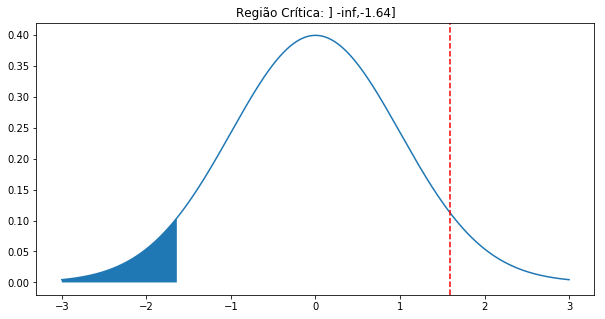

In [222]:
def regiao_critica_unilateral(x, v, de, z0, mu, sigma):
    y = norm.pdf(x, mu, sigma)
    if de==1: # Direito
        z = x[x>v]
    else: # Esquerdo
        z = x[x<v]
    plt.plot(x, y)
    plt.axvline(x=z0, color='r', linestyle='--')
    plt.fill_between(z, 0, norm.pdf(z, mu, sigma))
    if de==1: # Direito
        title=('Região Crítica: [' + str(v) + ', +inf[')
    else: 
        title=('Região Crítica: ] -inf,' + str(v) +']')
    plt.title(title)
    plt.show()
    
z=-1.64 
x=np.arange(-3,3,0.001)
regiao_critica_unilateral(x,z,0,z04,0,1)

**Passo 4:** Verficar se z0 faz parte da região crítica.
    
Percebe-se que z0 não faz parte da região crítica, então aceita-se a hipotese nula. Ou seja, há evidências que a proporção para concentração de sílica é maior ou igaul a 60,1976%.

O IC para 95% para a média da popluação é:

\begin{equation*}
\ IC(\mu;0.95)= \hat{p}\pm z_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
\end{equation*}

In [223]:
print('O IC: ]',pB_S_a2+z1*(np.sqrt((pB_S_a2*(1-pB_S_a2))/tamanho_amostras)),',',pB_S_a2+z2*(np.sqrt((pB_S_a2*(1-pB_S_a2))/tamanho_amostras)),'[')

O IC: ] 0.5885706742888257 , 0.7714293257111744 [
